# XGBoost回归的sklearnAPI实现

不同于内嵌在sklearn框架中的其他算法，xgboost是独立的算法库，因此它有一套不同于sklearn代码的原生代码。本部分时候我们使用原生代码来运行xgb00st,因为这套原生代码是完全为集成学习所设计的，不仅可以无缝使用交叉验证、默认输出指标为RMSE,还能够默认输出训练集上的结果帮我们监控模型。然而对于熟悉sklearn的我们来说，这一套代码略有难度，因此许多人也会倾向于使用xgboost自带的sklearn接口来实现算法。

XGBoost自带sklearn接口(sklearn API),通过这个接口，我们可以使用跟sklearn代码一样的方式来实现xgboost,即可以通过fit和predict等接口来执行训练预测过程，也可以调用属性比如coef_等。在XGBoost的sklearn API中，我们可以看到下面五个类：

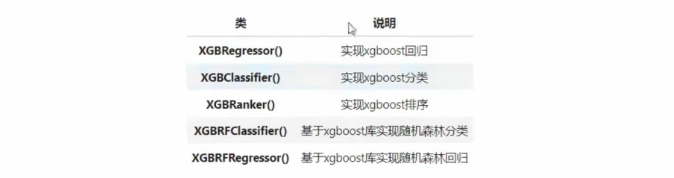

其中XGBRF的两个类是以XGBoost方式建树、但以bagging,方式构建森林的类，通常只有在我们使用普通随机森林效果不佳、但又不希望使用Boosting的时候使用。这种使用XGBoost方式建树的森林在sklearn中已经开始了实验，不过还没有正式上线。

另外两个类就很容易理解了，一个是XGBo0s的回归，一个是XGB00st的分类。这两个类的参数高度相似，我们可以以XGBoost回归为例查看：

In [1]:
import xgboost

In [2]:
xgboost.XGBClassifier?

Init signature:
xgboost.XGBClassifier(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree o

In [3]:
xgboost.XGBRegressor?

Init signature:
xgboost.XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta

可以看到，两个类的参数都很多，其中不乏一些我们非常熟恶的参数，例如n_estimators,learning_rate,ma×depth等，但大部分参数还是需要我们重新学习和认识，这与xgboost复杂的原理有很大的关系，但由于是sklearn API,所以所有这些参数都有相应的默认值。我们可以在不认识参数的情况下调用这个类。以回归类为例我们来看：

In [4]:
from xgboost import XGBRegressor
from sklearn.model_selection import  cross_validate, KFold
from sklearn.model_selection import train_test_split

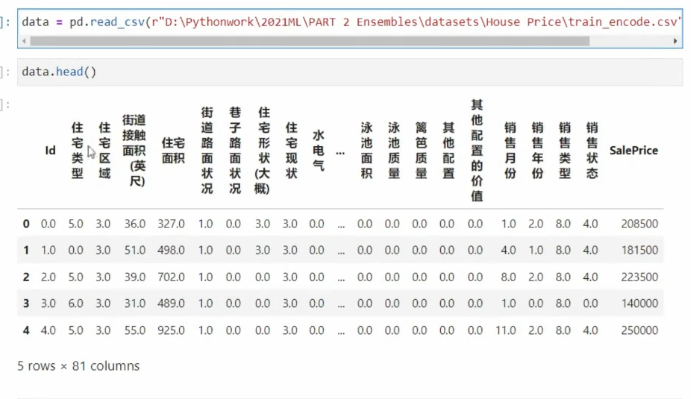

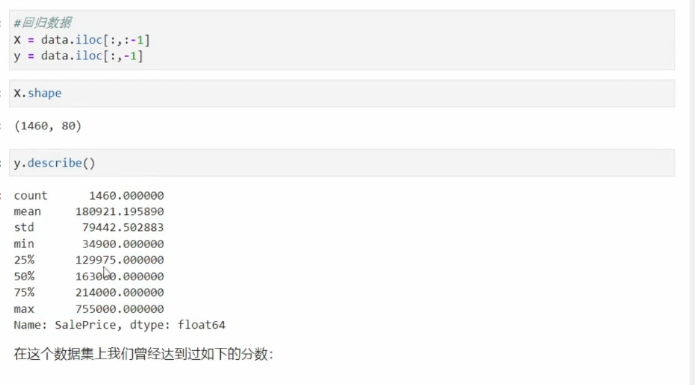

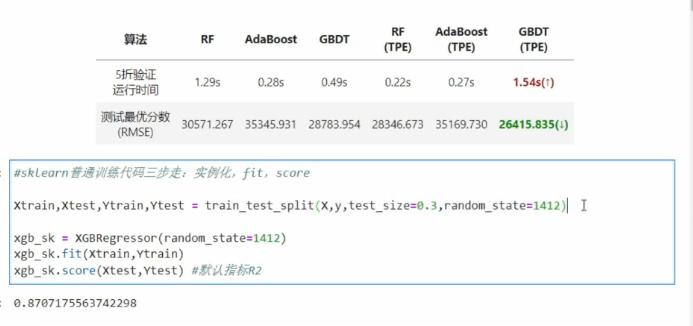

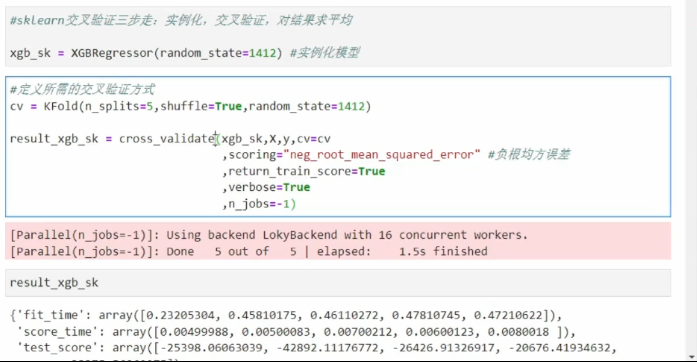

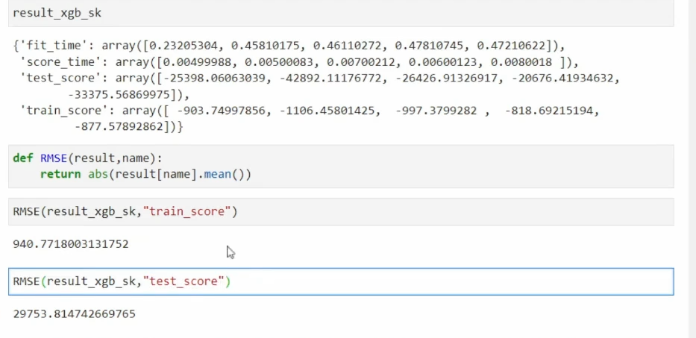

可以看到，在默认参数下，xgboost模型极度不稳定，并且过拟合的情况非常严重，在训练集上的RMSE达到了前所未有的低点940.77，这说明XGBo0st的学习能力的确强劲，现有数据量对xgb00st来说可能有点不足。在没有调整任何参数的情况下，XGB00st的表现没能胜过梯度提升树，这可能是因为在默认参数下梯度提升树的过拟合程度较轻。我们可以尝试使用之前学过的知识，对XGB00st的参数略微进行调整，例如将最可能影响模型的参数之一：ma× depth设置为一个较小的值。

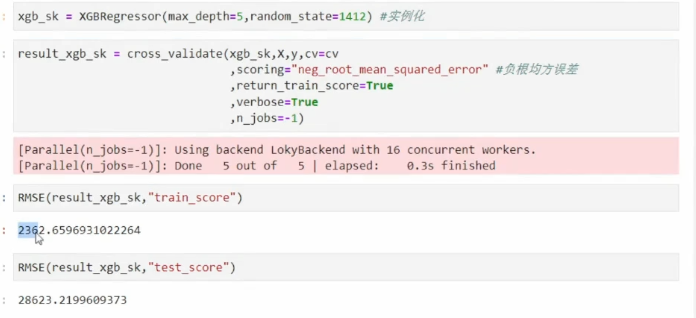

过拟合程度立刻减轻了，这说明模型是有潜力的，经过精密的调参之后xgb00st上应该能够获得不错的结果。

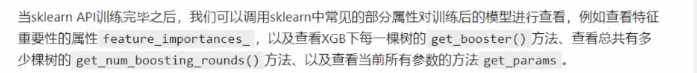

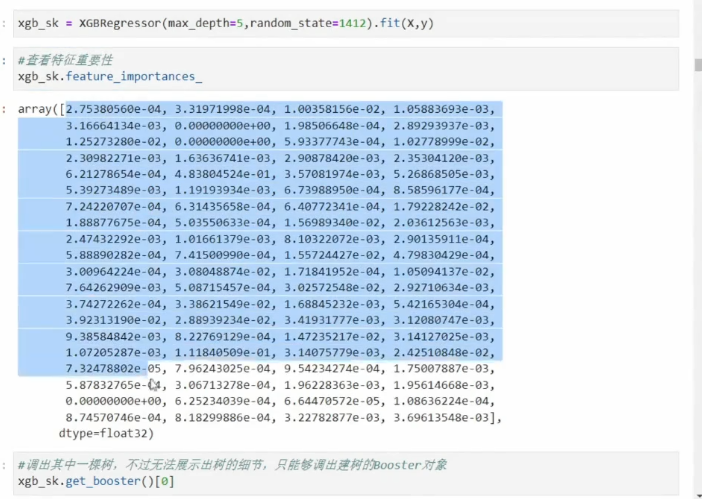

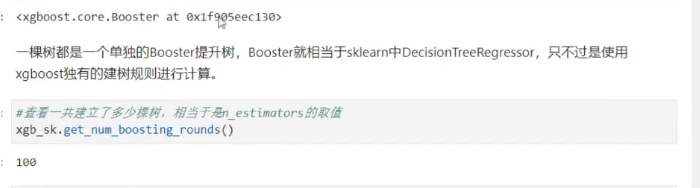

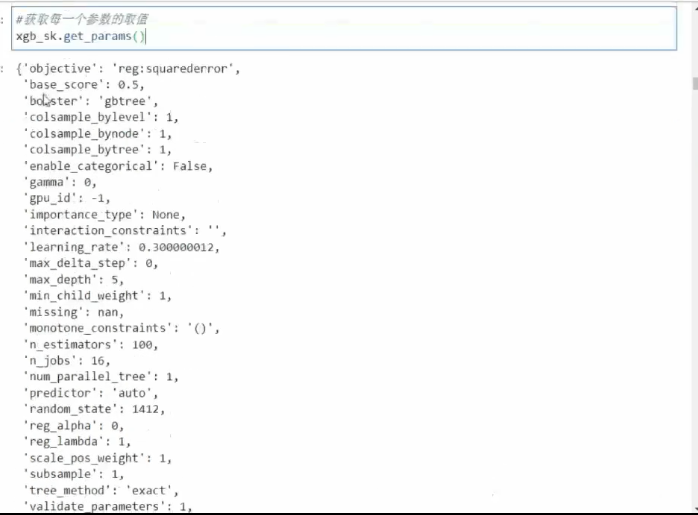

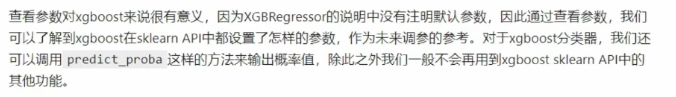